In [55]:
from dataget import *
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

query = """SELECT comments.sentiment FROM youtube_local.comments, channels
where channels.channel_name = 'Behindwoods TV';"""

In [57]:
query = """SELECT c.channel_name, cm.sentiment FROM channels c
JOIN videos v ON c.channel_id = v.channel_id
JOIN comments cm ON v.video_id = cm.video_id
ORDER BY c.channel_name, cm.sentiment;
"""

In [58]:
df = pd.read_sql(query, engine)
print(df.head())

     channel_name  sentiment
0  Behindwoods TV    -0.9998
1  Behindwoods TV    -0.9901
2  Behindwoods TV    -0.9849
3  Behindwoods TV    -0.9848
4  Behindwoods TV    -0.9847


In [59]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [60]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

C:\Users\Elamparithi\AppData\Local\Temp\ipykernel_6160\37014785.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Channel")  # Optional: Customize the legend title


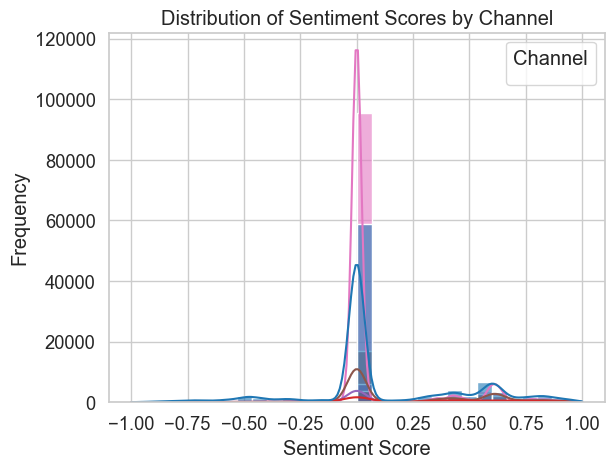

In [61]:
sns.histplot(
    data=df, 
    x='sentiment', 
    hue='channel_name', 
    kde=True, 
    bins=30, 
    palette='tab10',  # Customize color palette
    alpha=0.6  # Adjust transparency for better visualization
)

# Add plot titles and labels
plt.title("Distribution of Sentiment Scores by Channel")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend(title="Channel")  # Optional: Customize the legend title
plt.show()

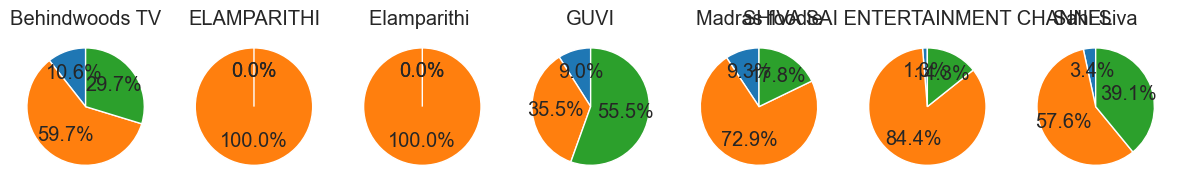

In [62]:
import matplotlib.patches as mpatches

# Assuming 'grouped_data' is a DataFrame with sentiment data for each channel
fig, axes = plt.subplots(1, len(grouped_data), figsize=(12, 6))

# Define color labels for the legend
colors = plt.cm.tab10.colors[:3]
labels = ["Negative", "Neutral", "Positive"]

# Create pie charts
for i, (channel, row) in enumerate(grouped_data.iterrows()):
    ax = axes[i] if len(grouped_data) > 1 else axes
    row.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, labels=None, colors=colors)
    ax.set_title(channel)
    ax.set_ylabel("")

# Add a central legend
# legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
# fig.legend(handles=legend_patches, loc='center', frameon=False, ncol=1, fontsize='medium', bbox_to_anchor=(0.5, 0.5))

plt.tight_layout()
plt.show()

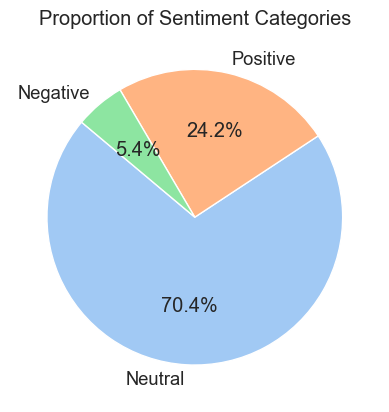

In [63]:
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title('Proportion of Sentiment Categories')
plt.show()

C:\Users\Elamparithi\AppData\Local\Temp\ipykernel_6160\15318091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="channel_name", y="sentiment", hue=None, palette="pastel")


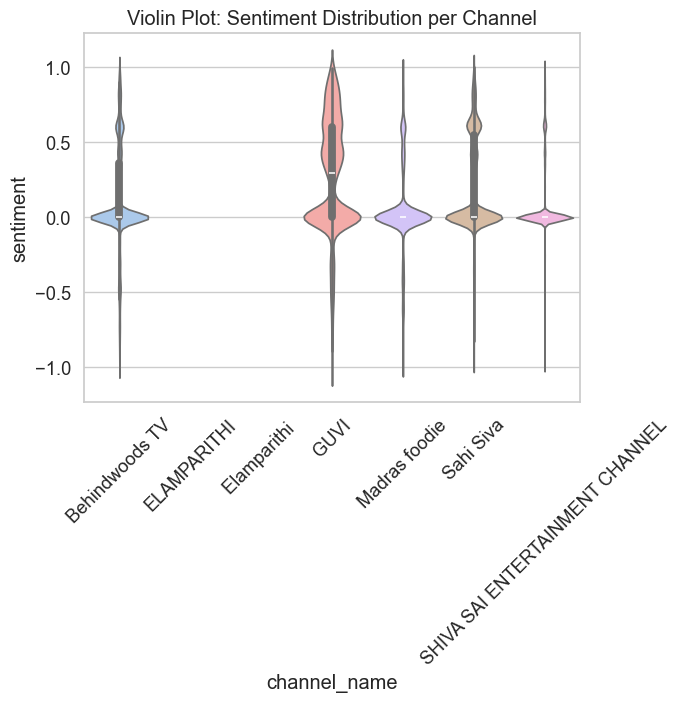

In [64]:
sns.violinplot(data=df, x="channel_name", y="sentiment", hue=None, palette="pastel")
plt.title('Violin Plot: Sentiment Distribution per Channel')
plt.xticks(rotation=45)
plt.show()

C:\Users\Elamparithi\AppData\Local\Temp\ipykernel_6160\598258448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="channel_name", y="sentiment", hue=None, palette="pastel", ax=ax)


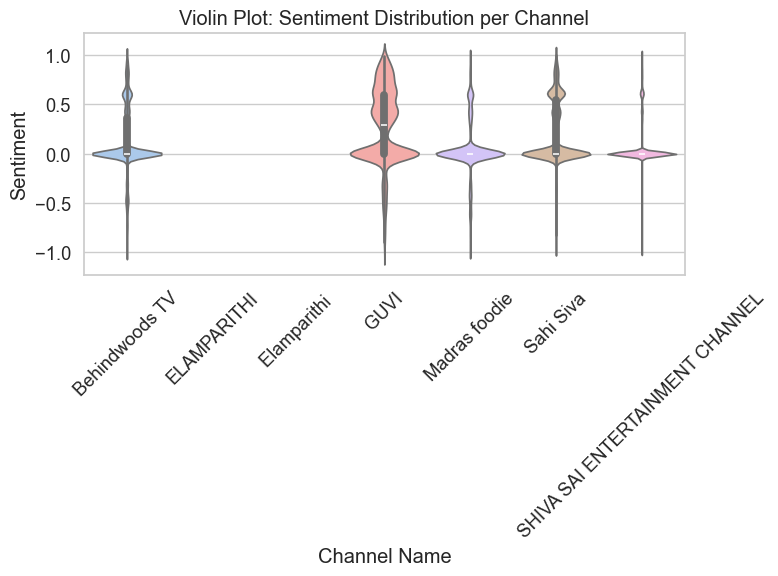

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure with one subplot
sns.violinplot(data=df, x="channel_name", y="sentiment", hue=None, palette="pastel", ax=ax)
ax.set_title('Violin Plot: Sentiment Distribution per Channel')  # Set the title
ax.set_xlabel('Channel Name')  # Optional: Set x-axis label
ax.set_ylabel('Sentiment')  # Optional: Set y-axis label
plt.xticks(rotation=45)  # Tilt the x-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [66]:
engine.dispose()

In [67]:
data = {
    "channel_name": ["Channel A"] * 50 + ["Channel B"] * 50 + ["Channel C"] * 50,
    "sentiment": (
        ["positive"] * 20 + ["neutral"] * 15 + ["negative"] * 15 +  # Channel A
        ["positive"] * 10 + ["neutral"] * 25 + ["negative"] * 15 +  # Channel B
        ["positive"] * 30 + ["neutral"] * 10 + ["negative"] * 10    # Channel C
    )
}
df = pd.DataFrame(data)

Text(0.5, 0.98, 'Distribution Plots of Sentiments by Channel')

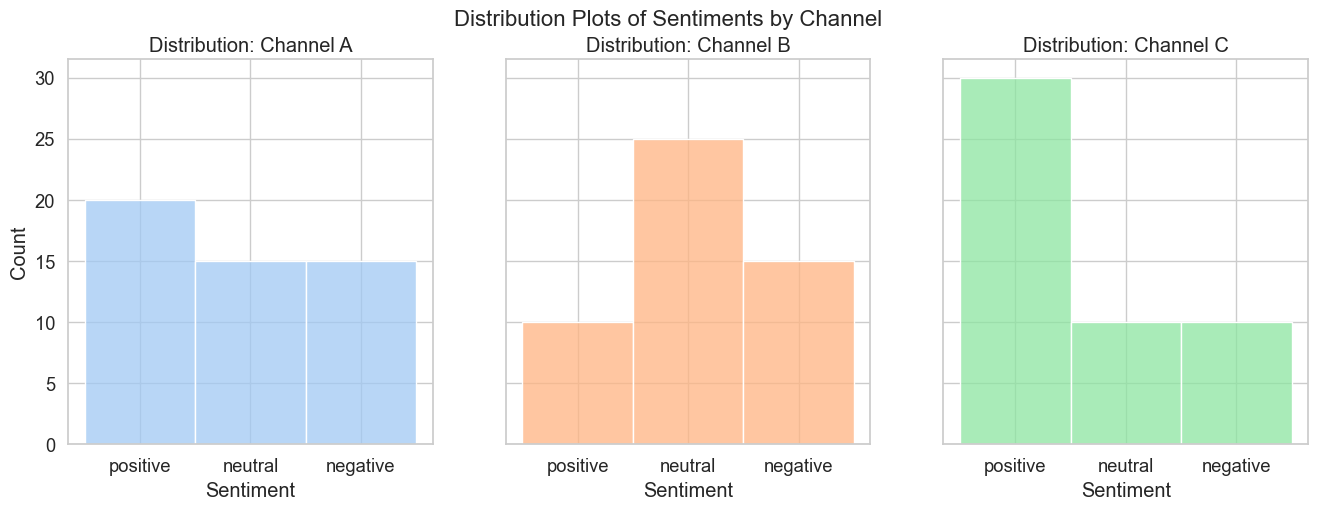

In [68]:
# Distribution Plots (Subplots): Histograms for each channel
channels = df['channel_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(channels), figsize=(16, 5), sharey=True)
for i, channel in enumerate(channels):
    sns.histplot(df[df['channel_name'] == channel]['sentiment'], ax=axes[i], color=sns.color_palette("pastel")[i], kde=False)
    axes[i].set_title(f'Distribution: {channel}')
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')

fig.suptitle('Distribution Plots of Sentiments by Channel', fontsize=16)